In [172]:
maindir = '/home/matthew/Desktop/DataOutputs/HFWM DATA/'
#maindir ='C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Lab Data/'

0.023721299187609124
mu1 = 0.002111671782041167 for wavelength =  840  nm
mu2 = 0.0017826501819614357 for wavelength =  840  nm
mu3 = 0.0006166053847368168 for wavelength =  840  nm
mu4 = 0.0006711952160336414 for wavelength =  840  nm


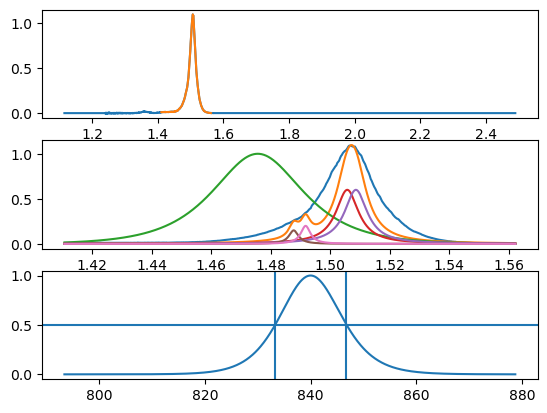

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import voigt_profile as voigt
from scipy import constants as c 
def gauss(x,A,S,x0):
    return A*np.exp(-(x-x0)**2/S**2/2)
def lorentz(x,A,G,x0):
    return A*1/(1+((x-x0)/G)**2)
def PLfunct(E,A,B,C,D,G1,G2,G3,G4,x1,x2,x3,x4):
    return lorentz(E,A,G1,x1)+lorentz(E,B,G2,x2)+lorentz(E,C,G3,x3)+lorentz(E,D,G4,x4)
def energydist(E,E0,Ew,A):
    return A/np.cosh((E-E0)/Ew)
def dE(wl0,wlw):
    return 1239.513/(wl0-wlw)-1239.513/(wl0+wlw)
E0 = 1.5057
Ex1 =  0.0029#exciton splitting energy
Ex2 =  0.004#Acceptor bound exciton splitting energy 
EB  = -0.018 #Acceptor bound exciton binding energy  
E21 =  E0 
E61 =  E0+Ex1 
Ei21 = E0+EB 
Ei61 = E0+Ex2+EB 
A = .6
B = .6
C = .15
D = .2
gm21  =  2*c.hbar*(3.5e12)/c.e#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 2*c.hbar*3.5e12/c.e#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 2*c.hbar*1.5e12/c.e#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 2*c.hbar*1.5e12/c.e#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
PL = np.loadtxt('/home/matthew/Desktop/GitHub/FittingFunctions/exampledata/1550uW 14K.csv',delimiter=';',skiprows=49,max_rows=3647)
fig,ax = plt.subplots(3)
start = 1800
end = 2300
#print(gmi21)
ax[0].plot(1239.513/(PL[:,0]-.5),PL[:,1])
ax[0].plot(1239.513/(PL[start:end,0]-.5),PL[start:end,1])
ax[1].plot(1239.513/(PL[start:end,0]-.5),PL[start:end,1])#1239.513/
xdata = np.linspace(1239.513/(PL[start,0]-.5),1239.513/(PL[end,0]-.5),1000)
ydata = PL[start:end,1]
plfit = PLfunct(xdata,A,B,C,D,gm21,gm61,gmi21,gmi61,E21,E61,Ei21,Ei61)
ax[1].plot(xdata,plfit)#1239.513/
wlw = 13.5
wl0 = 840
E0 = 1239.513/(wl0)
Efwhm = dE(wl0,wlw)/2
print(Efwhm)
Ew = Efwhm/1.76
excitation=energydist(xdata,E0,Ew,1)
ax[1].plot(xdata,excitation)
ax[1].plot(xdata,lorentz(xdata,A,gm21,E21))
ax[1].plot(xdata,lorentz(xdata,B,gm61,E61))
ax[1].plot(xdata,lorentz(xdata,C,gmi21,Ei21))
ax[1].plot(xdata,lorentz(xdata,D,gmi61,Ei61))
ax[2].plot(1239.5/xdata,excitation**2)
ax[2].axvline(wl0-wlw/2)
ax[2].axvline(wl0+wlw/2)
ax[2].axhline(.5)
dx = xdata[0]-xdata[1]
print('mu1 =',np.sum(dx*excitation*lorentz(xdata,A,gm21,E21)),'for wavelength = ',wl0,' nm')
print('mu2 =',np.sum(dx*excitation*lorentz(xdata,B,gm61,E61)),'for wavelength = ',wl0,' nm')
print('mu3 =',np.sum(dx*excitation*lorentz(xdata,C,gmi21,Ei21)),'for wavelength = ',wl0,' nm')
print('mu4 =',np.sum(dx*excitation*lorentz(xdata,D,gmi61,Ei61)),'for wavelength = ',wl0,' nm')

[1. 0.]
[1. 0.]


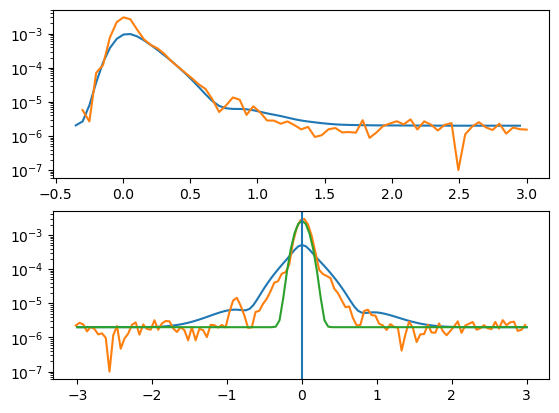

In [212]:
#fit for 815
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve

def gauss(t,sigma,t0):
      return 1/(sigma*np.sqrt(np.pi*2))*np.exp(-.5*((t-t0)/(sigma))**2)
directory =maindir+'/HFWMV2 CS NW InitialTest/LongCollections/Results/'
T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM815135T3refcut.csv'
T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM815135T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
ol21 = 1.0#overlap of hh exciton state
ol61 = 1.1#overlap of lh exciton state
oli21 = 0.2 #overlap of hh bound exciton state
oli61 = 0.2#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.004/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.018/c.hbar #Acp0 = [Ex1   ,Ex2   , # 0,1
  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 0.5e-121#
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61, gmi21  , # 8,9
      gmi61, K     ]   # 10,11

t = T3refdata[:,0]*1e-12+7e-12

dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.335,t0),mode='same')

fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-7.05,Pv+2e-6)
axs[0].plot(T3refdata[:,0],T3refdata[:,1])

tau = T12data[:,0]*1e-12
t = 7.1e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.18e-12/2.355,tau0),mode='same')

axs[1].plot(tau*1e12,Pv+2e-6)
axs[1].plot(T12data[0:,0]-.02,T12data[0:,1])
axs[1].plot(tau*1e12,2e-6+5e-16*gauss(tau,.18e-12/2.355,tau0))
axs[1].axvline(0)

plt.show()

[-0.3        -0.24923077 -0.19846154 -0.14769231 -0.09692308 -0.04615385
  0.00461538  0.05538462  0.10615385  0.15692308  0.20769231  0.25846154
  0.30923077  0.36        0.41076923  0.46153846  0.51230769  0.56307692
  0.61384615  0.66461538  0.71538462  0.76615385  0.81692308  0.86769231
  0.91846154  0.96923077  1.02        1.07076923  1.12153846  1.17230769
  1.22307692  1.27384615  1.32461538  1.37538462  1.42615385  1.47692308
  1.52769231  1.57846154  1.62923077  1.68        1.73076923  1.78153846
  1.83230769  1.88307692  1.93384615  1.98461538  2.03538462  2.08615385
  2.13692308  2.18769231  2.23846154  2.28923077  2.34        2.39076923
  2.44153846  2.49230769  2.54307692  2.59384615  2.64461538  2.69538462
  2.74615385  2.79692308  2.84769231  2.89846154  2.94923077  3.        ]
[1. 0.]
[1. 0.]


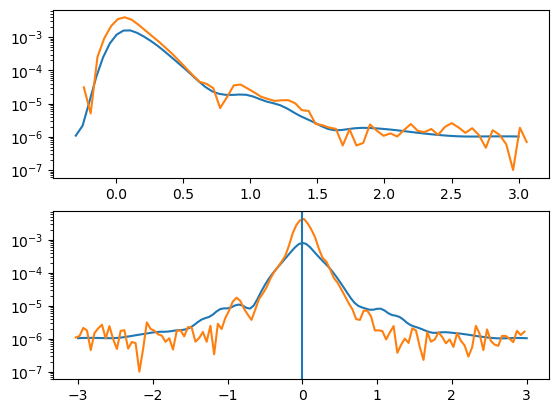

In [175]:
#fit for 820
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'HFWMV2 CS NW InitialTest/LongCollections/Results/'
T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM820135T3refcut.csv'
T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM820135T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])
ol21 = 1.0#overlap of hh exciton state
ol61 = 1.0#overlap of lh exciton state
oli21 = 0.5 #overlap of hh bound exciton state
oli61 = 0.5#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.004/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.018/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 1.0e-121#
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61, gmi21  , # 8,9
      gmi61, K     ]   # 10,11


t = T3refdata[:,0]*1e-12+7e-12
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.335,t0),mode='same')


fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-7,Pv+1e-6)
axs[0].plot(T3refdata[:,0]+.06,T3refdata[:,1])



tau = T12data[:,0]*1e-12
t = 7.1e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.18e-12/2.355,tau0),mode='same')

axs[1].plot(tau*1e12,Pv+1e-6)
axs[1].plot(T12data[0:,0]-.03,T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()

In [176]:
#fit for 825
import os sudo apt install ./zoom_amd64.deb
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'HFWMV2 CS NW InitialTest/LongCollections/Results/'
T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM825135T3refcut.csv'
T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM825135T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])
ol21 = 1.0#overlap of hh exciton state
ol61 = 1.0#overlap of lh exciton state
oli21 =0.5 #overlap of hh bound exciton state
oli61 = 0.5#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.004/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.018/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 1.5e-121#
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61, gmi21  , # 8,9
      gmi61, K     ]   # 10,11


t = T3refdata[:,0]*1e-12+7e-12
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.355,t0),mode='same')


fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-7,Pv+1e-6)
axs[0].plot(T3refdata[:,0]+.06,T3refdata[:,1])



tau = T12data[:,0]*1e-12
t = 7.1e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.18e-12/2.355,tau0),mode='same')

axs[1].plot(tau*1e12,Pv+1e-6)
axs[1].plot(T12data[0:,0]-.03,T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()

SyntaxError: invalid syntax (2862719101.py, line 2)

[-0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25
  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85
  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45
  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.    2.05
  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.45  2.5   2.55  2.6   2.65
  2.7   2.75  2.8   2.85  2.9   2.95  3.  ]
[0.5 0. ]
[0.5 0. ]


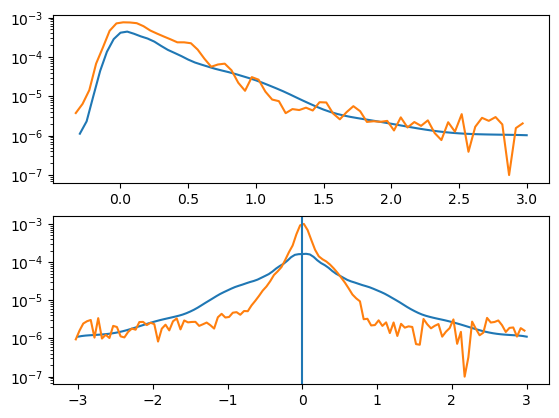

In [ ]:
#fit for 830
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'HFWMV2 CS NW InitialTest/LongCollections/Results/'
T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM830135T3refcut.csv'
T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM830135T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])
ol21 = 0.5#overlap of hh exciton state
ol61 = 1.0#overlap of lh exciton state
oli21 = 1.0 #overlap of hh bound exciton state
oli61 = 0.5#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.004/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.018/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 4e-122#
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61, gmi21  , # 8,9
      gmi61, K     ]   # 10,11


t = T3refdata[:,0]*1e-12+7e-12
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.355,t0),mode='same')


fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-7,Pv+1e-6)
axs[0].plot(T3refdata[:,0]-.03,T3refdata[:,1])



tau = T12data[:,0]*1e-12
t = 7.1e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.18e-12/2.355,tau0),mode='same')

axs[1].plot(tau*1e12,Pv+1e-6)
axs[1].plot(T12data[0:,0]-.03,T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()

[-0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25
  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85
  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45
  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.    2.05
  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.45  2.5   2.55  2.6   2.65
  2.7   2.75  2.8   2.85  2.9   2.95  3.  ]
[0.2 0. ]
[0.2 0. ]


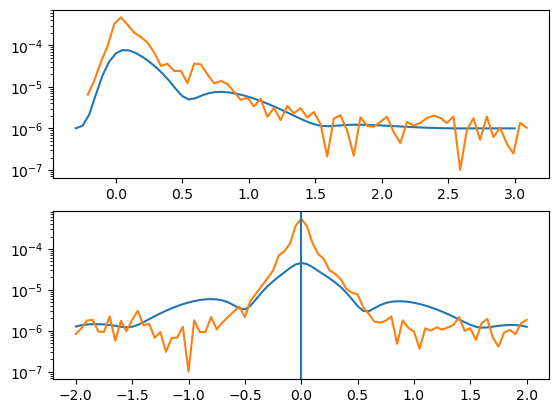

In [ ]:
#fit for 835
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'/HFWMV2 CS NW InitialTest/835nm/Results/'
T3reffile = '4mW1mW4mWphotonechok1-0_3ps2psk3-2ps2psk2-4ps835135T3refcut.csv'
T12file = '4mW1mW4mWphotonechok1-0_3ps2psk3-2ps2psk2-4ps835135T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])
ol21 = 0.2#overlap of hh exciton state
ol61 = 0.5#overlap of lh exciton state
oli21 = 1.0 #overlap of hh bound exciton state
oli61 = 1.0#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.004/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.018/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 4e-123#
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61, gmi21  , # 8,9
      gmi61, K     ]   # 10,11


t = T3refdata[:,0]*1e-12+7e-12
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.355,t0),mode='same')

fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-7,Pv+1e-6)
axs[0].plot(T3refdata[:,0]+.09,T3refdata[:,1])



tau = T12data[:,0]*1e-12
t = 7.1e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.18e-12/2.355,tau0),mode='same')

axs[1].plot(tau*1e12,Pv+1e-6)
axs[1].plot(T12data[0:,0],T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()

[-0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25
  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85
  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45
  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.  ]
[0. 0.]
[0. 0.]


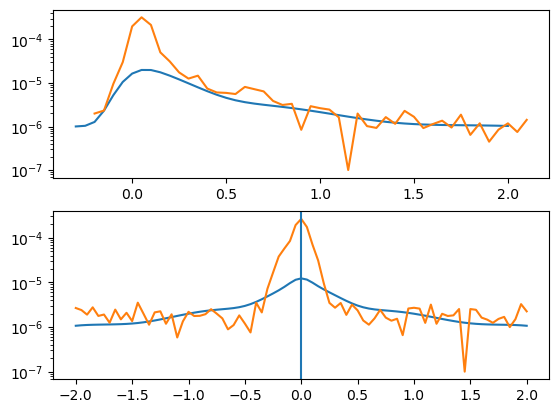

In [ ]:
#fit for 840
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'HFWMV2 CS NW InitialTest/840nm/Results/'
T3reffile = '3mW1mW3mWphotonechok1-0.3ps2psk3-2ps2psk2-4ps2T3refcut.csv'
T12file = '3mW1mW3mWphotonechok1-0.3ps2psk3-2ps2psk2-4ps2T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])
ol21 = 0.0#overlap of hh exciton state
ol61 = 0.0#overlap of lh exciton state
oli21 = 0.6 #overlap of hh bound exciton state
oli61 = 1.0#overlap of lh bound exciton state
Ex1 =  c.e*0.029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.004/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.018/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 2e-123#
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61, gmi21  , # 8,9
      gmi61, K     ]   # 10,11


t = T3refdata[:,0]*1e-12+7e-12
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.355,t0),mode='same')


fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-7,Pv+1e-6)
axs[0].plot(T3refdata[:,0]+.1,T3refdata[:,1])



tau = T12data[:,0]*1e-12
t = 7.1e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.18e-12/2.355,tau0),mode='same')

axs[1].plot(tau*1e12,Pv+1e-6)
axs[1].plot(T12data[0:,0],T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()